## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "sweets"
hashtag = "スイーツ" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "22-22"
tau = 32
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(32, 'スイーツ', 9035)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
スイーツ,9034
カフェ,2434
sweets,1938
ケーキ,1728
デザート,1718
...,...
브라더앤시스터,1
丸平珈琲,1
レゴランド,1
ママの息抜き,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['レゴランド', 'ママの息抜き', '苫小牧グルメ', '丸平珈琲', '１ミリモンブラン', 'ジョナサン', '브라더앤시스터']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
カフェ,2433
sweets,1937
ケーキ,1727
デザート,1717
おやつ,1636
...,...
ほうじ茶パフェ,1
Uand,1
パフェ缶自販機,1
マーロウプリン,1


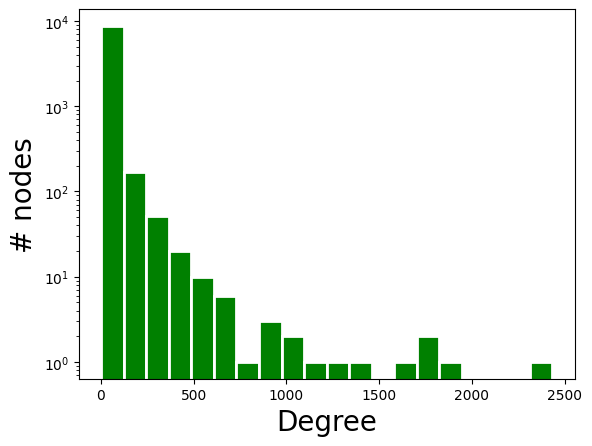

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4078447669619023, 
its standard error sigma: 0.04996254123115212, 
k_min: 54.0


(2.4078447669619023, 0.04996254123115212, 54.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 5.742624872105553e-08.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.3314726886079892.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_sweets_22-22_32.pdf
../data/figure/degree_distribution/pdfccdf2_sweets_22-22_32.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4078447669619023, 
its standard error sigma: 0.04996254123115212, 
k_min: 54.0


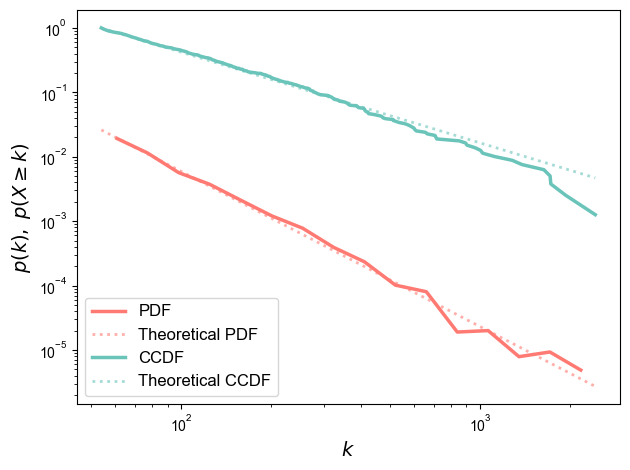

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4078447669619023, 
its standard error sigma: 0.04996254123115212, 
k_min: 54.0


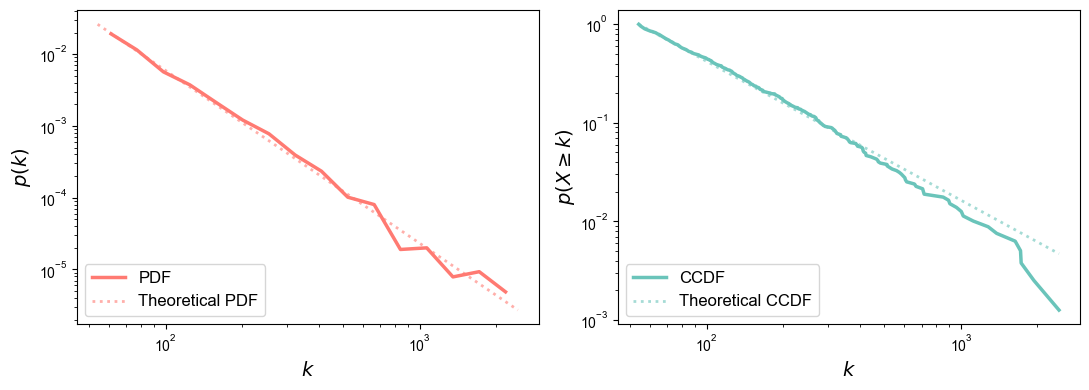

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')